<a href="https://colab.research.google.com/github/wangpouwei/Paul/blob/master/simpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train),(x_test, y_test) = load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
trans = ['airplane', 'automobile', 'bird', 'cat',' deer', 
         'dog', 'frog', 'horse', 'boat', 'truck']

cat


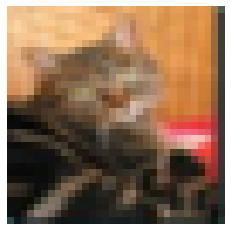

In [4]:
from io import IncrementalNewlineDecoder
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,49999)
plt.axis("off")
#trans[0] => plane
# y_train[c] => a list
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])


In [5]:
# 資料預先處理
# 1. 題目預先處理(Normalize)
# 捲機網路不需要攤開，所以不需要reshape
x_train_shape = x_train/255
x_test_shape = x_test/255
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
# 2.答案預先處理()
# 希望的樣子[p1, p2, p3, ...p9]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原來", y_train[1])
print("後來", y_train_cat[1])

原來 [9]
後來 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
#一個過濾器 3 * 3 * 3(R, G, B) * (filter數目) 32 + (bias)32 = 896
cnn.add(Conv2D(32, (3,3),
        input_shape = (32, 32, 3),
        padding = "same",
        activation = "relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

#一個過濾器 3 * 3 * 32 * (filter數目) 64 + (bias)64 = 18496
cnn.add(Conv2D(64, (3,3),
        padding = "same",
        activation = "relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, (3,3),
        padding = "same",
        activation = "relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [8]:
# 確定模型訓練方式
# 隨機(隨便一組weight)梯度(正確方向)下降
# loss: 最後輸出一個 ： binary_crossrntropy  多個categorical_crossentropy
cnn.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
              optimizer="adam")

In [11]:
# batch；看幾筆(200)做一次梯度下降(修正
# epochs`: 整份考古題(資料)看幾次(10)
# 10個epochs ,200batch_size ：60000*10/200 =>3000次的修正
                    
cnn.fit(x_train_shape,
    y_train_cat,
    batch_size=200,
    epochs = 5,
    validation_split= 0.1,
        )

Epoch 1/5
225/225 [==============================] - 2s 10ms/step - loss: 0.4508 - accuracy: 0.8445 - val_loss: 0.7435 - val_accuracy: 0.7610
Epoch 2/5
225/225 [==============================] - 2s 9ms/step - loss: 0.4074 - accuracy: 0.8579 - val_loss: 0.7151 - val_accuracy: 0.7658
Epoch 3/5
225/225 [==============================] - 2s 10ms/step - loss: 0.3612 - accuracy: 0.8745 - val_loss: 0.7512 - val_accuracy: 0.7586
Epoch 4/5
225/225 [==============================] - 2s 10ms/step - loss: 0.3196 - accuracy: 0.8901 - val_loss: 0.7825 - val_accuracy: 0.7614
Epoch 5/5
225/225 [==============================] - 2s 10ms/step - loss: 0.2651 - accuracy: 0.9103 - val_loss: 0.7748 - val_accuracy: 0.7708


In [12]:
cnn.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.8465 - accuracy: 0.7494


[0.8465409874916077, 0.7494000196456909]

In [18]:
import pandas as pd
#predict : 機率  predict_classes : 分類
import numpy as np
#tensorflow取消 predict_classes 需用以下取代
predict_x = cnn.predict(x_test_shape) 
pre = np.argmax(predict_x,axis=1)
# pre = mlp.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))
# trans = ['airplane', 'automobile', 'bird', 'cat',' deer', 
#          'dog', 'frog', 'horse', 'boat', 'truck']

313/313 [==============================] - 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9
0,749,12,61,30,18,3,7,11,88,21
1,12,828,6,11,3,1,10,4,35,90
2,40,5,699,65,61,48,34,26,12,10
3,15,3,63,655,37,108,45,40,18,16
4,8,2,103,79,672,38,29,51,14,4
5,14,6,55,192,40,608,25,42,12,6
6,4,2,63,78,29,14,790,4,12,4
7,14,3,37,52,43,41,4,788,5,13
8,31,19,18,15,5,4,4,3,883,18
9,38,53,11,20,3,4,5,11,33,822


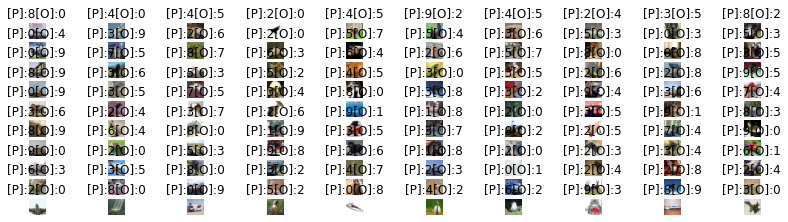

In [31]:
import numpy as np
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]
orifalse = y_dim[diff]
prefalse = pre[diff]
imgfalse = x_test[diff]
plt.figure(figsize=(14,900))
width = 10
height = int(len(imgfalse/10))+1
for (i, img) in enumerate(imgfalse[0:100]):
  plt.subplot(height, width, i+1)
  plt.axis("off")
  t = "[P]:"+ str(prefalse[i]) + "[O]:" +str(orifalse[i])
  plt.title(t)
  plt.imshow(img)
# trans = ['airplane', 'automobile', 'bird', 'cat',' deer', 
#          'dog', 'frog', 'horse', 'boat', 'truck']